<a href="https://colab.research.google.com/github/FSalteri/Tornetwork.ipynb/blob/main/Tor__new_copy3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Εισαγωγή βιβλιοθηκών
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
!pip install dataprep
%matplotlib inline

In [23]:
# Έλεγχος κατανομής κλάσεων
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Tor", "NonTor"]


In [24]:
# Φόρτωση συνόλου δεδομένων και μετατροπή σε DataFrame
url = "https://raw.githubusercontent.com/kdemertzis/EKPA/refs/heads/main/Data/DarkNet.csv"
data = pd.read_csv(url)
df = pd.DataFrame(data)
df.shape

<ipython-input-24-5bf594da7c9a>:3: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


(68580, 83)

In [25]:
# ανακάτεμα των δεδομένων
df = df.sample(frac = 1)

In [26]:
# οπτικοποίηση συνόλου δεδομένων
df.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label-1,Label-2
22212,131.202.243.21,52697,224.0.0.252,5355,17,417266,2,0,44,0,...,0,0,0,0,0,0.0,0,0,NonVPN,Email
6072,10.152.152.11,23032,10.152.152.10,53,17,230850,1,1,37,53,...,0,0,0,0,0,0.0,0,0,Non-Tor,Browsing
45152,10.152.152.11,9100,130.111.182.229,51413,17,9411316,3,0,60,0,...,0,0,0,0,1456270000000000,0.0,1456270000000000,1456270000000000,Non-Tor,P2P
64315,10.8.0.10,25821,131.202.244.5,53,17,762,1,1,37,373,...,0,0,0,0,0,0.0,0,0,VPN,Audio-Streaming
22683,131.202.240.185,49240,224.0.0.252,5355,17,410869,2,0,44,0,...,0,0,0,0,0,0.0,0,0,NonVPN,Email


In [27]:
# διαγραφή κενών ή μη αριθμητικών τιμών
data = data.select_dtypes(include=['float64', 'int64']).dropna()

In [28]:
# Δημιουργία νέας στήλης "Class" που ορίζει αν ο χρόνος ροής είναι μεγάλος (για ανίχνευση Tor)
# Διαχωρισμός ανεξάρτητων και εξαρτημένων μεταβλητών
data['Class'] = (data['Flow_Duration'] > 1e6).astype(int)
x = data.drop(columns=['Class'])
y = data['Class']

In [29]:
# Διαχωρισμός των δεδομένων σε σύνολα εκπαίδευσης και δοκιμής
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

Text(0, 0.5, 'Frequency')

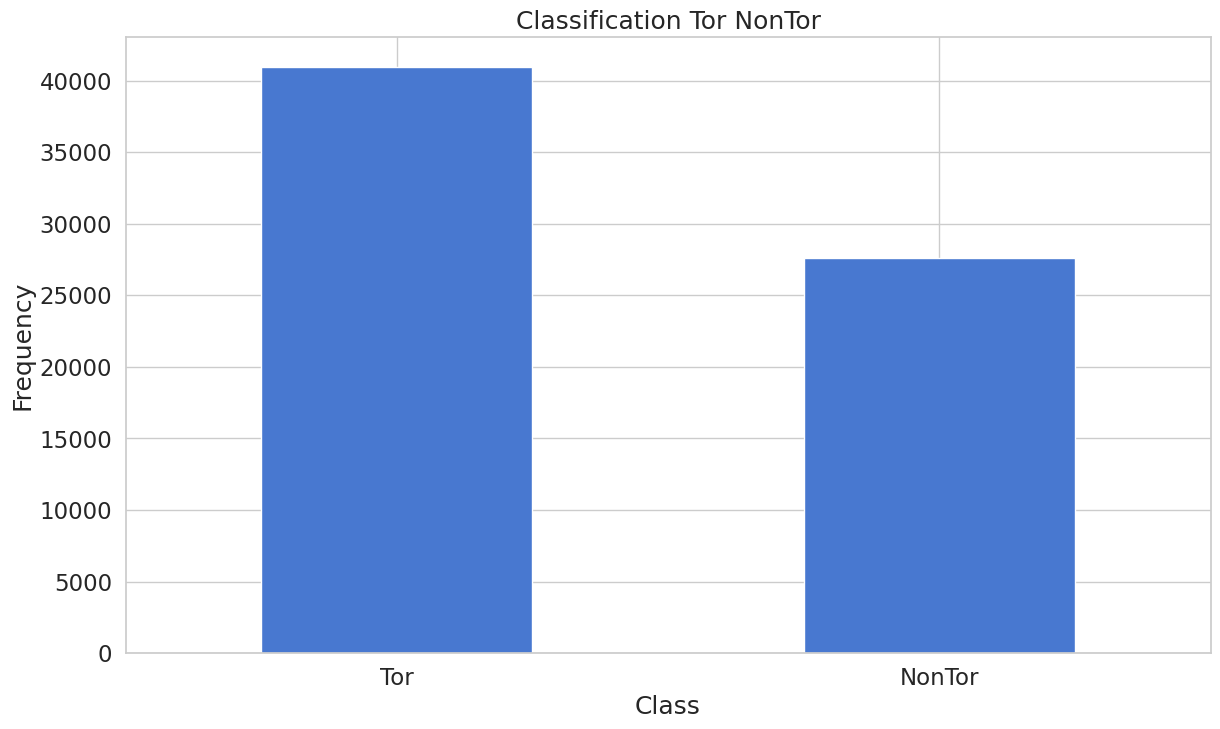

In [30]:
# Οπτικοποίηση της κατανομής των κλάσεων (Tor και NonTor)
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Classification Tor NonTor")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [31]:
# Δημιουργία αλγορίθμου Random Forest για ταξινόμηση
model=RandomForestClassifier(n_estimators=100)

In [32]:
# Αντικατάσταση των απειροτέρων (Inf) τιμών με NaN και μετατροπή τους σε αριθμούς
import numpy as np  # Εισαγωγή της βιβλιοθήκης numpy
x_train = np.where(np.isinf(x_train), np.nan, x_train)
x_train = np.nan_to_num(x_train, nan=0.0, posinf=1e6, neginf=-1e6)

In [33]:
# Εισαγωγή του RandomForestClassifier από τη βιβλιοθήκη sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [34]:
# Εκπαίδευση αλγορίθμου
model.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
# Μετατροπή Inf -> NaN στα δεδομένα δοκιμών
x_test = np.where(np.isinf(x_test), np.nan, x_test)

In [36]:
# Αντικατάσταση NaN και Inf με συγκεκριμένες τιμές
x_test = np.nan_to_num(x_test, nan=0.0, posinf=1e6, neginf=-1e6)

In [37]:
# Πρόβλεψη συνόλου δοκιμής
y_pred = model.predict(x_test)

In [38]:
# υπολογισμός μετρικών αξιολόγησης (accuracy, precision, recall, f-score, confusion matrix)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [39]:
# Εκτύπωση αποτελεσμάτων
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
Confusion Matrix:
 [[8290    0]
 [   0 5426]]
